# DIMENSIONALITY REDUCTION - REDUCCIÓN DE LA DIMENSIONALIDAD

## Explorando Datos con Muchas Dimensiones

En el siguiente Ejercicio practicaremos el Concepto de Dimensionality Reduction. Entenderemos la diferencia entre feature selection y feature extraction y practicaremos  ejercicios en Python para cada uno de estos casos. También veremos un ejemplo práctico de ** t-SNE**, (T-distributed Stochastic Neighbor Embedding) un algoritmo diseñado para la visualización de conjuntos de datos de alta dimensionalidad.

En el siguiente enlace, puedes encontrar todos los datasets que necesitare
mos para hacer las prácticas. Descargatelos y súbelos a colab.

https://drive.google.com/drive/u/0/folders/1mjSY031Bh697u7XHqgikqCvKGAvrSRJH

In [ ]:
#while True:pass

In [1]:
#Cargamos las librerías que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Definimos el tamaño de los ficheros
plt.rcParams['figure.figsize'] = (10, 5)

##1. Explorando Dataset de Pokemon

El siguiente conjunto de datos es una parte del dataset de pokemon que podéis encontrar en Kaggle. Este conjunto de datos contiene información sobre todos los 802 Pokémon de las Siete Generaciones de Pokémon.

In [2]:

#Cargamos el dataset y mostramos las primeras 5 filas

pokemon = pd.read_csv('C:/Users/dario/OneDrive/Documentos/GitHub/M-ster-EDEM-22-23/3_Aprendizaje_Automatico/Machine_Learning/Regresión/Datasets/pokemon_data.csv')
pokemon.head()


,name,type1,type2,attack,defense,hp,weight_kg,generation
0,Bulbasaur,grass,poison,49,49,45,6.9,1
1,Ivysaur,grass,poison,62,63,60,13.0,1
2,Venusaur,grass,poison,100,123,80,100.0,1
3,Charmander,fire,NaN,52,43,39,8.5,1
4,Charmeleon,fire,NaN,64,58,58,19.0,1


In [3]:
#Podemos saber el número de filas y columnas del conjunto de datos utilizando la función shape.

pokemon.shape

(151, 8)

### Eliminando características con 0 Variación.

Cuando tenemos muchas columnas en nuestro dataset, por ejemplo, más de 10, podemos considerar nuestro conjunto de datos como de alta dimensión.

Si desconocemos el dataset, puede ser difícil encontrar patrones en los datos debido a la complejidad que conlleva la alta dimensión. Para solucionar esto, podemos reducir el número de columnas utilizando técnicas de reducción de la dimensionalidad. Sin embargo, estas técnicas también pueden ser útiles para datasets más pequeños, como este mismo.


En el dataset que estamos viendo aquí, todos los pokémon vienen de la misma generación (primera). Si estamos interesados en saber cómo de diferentes son los pokémon, esta característica no nos sería nada útil ya que no existe ninguna varianza. Podríamos reducir la dimensionalidad simplemente eliminando esta columna.



Para tener una idea de qué características no tienen ninguna variación, podemos utilizar el método `describe`de Pandas. Este método devuelve información estadística de los datos del dataframe o de la serie. Esta información incluye el número de muestras, **el valor medio,  la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.**

In [4]:
pokemon.describe()

,attack,defense,hp,weight_kg,generation
count,151.000000,151.000000,151.000000,133.000000,151.0
mean,74.529801,70.079470,64.344371,45.827820,1.0
std,29.863647,29.146875,28.593483,58.066391,0.0
min,5.000000,5.000000,10.000000,0.100000,1.0
25%,51.000000,50.000000,45.000000,9.500000,1.0
50%,70.000000,65.000000,60.000000,30.000000,1.0
75%,95.000000,85.000000,80.000000,59.000000,1.0
max,155.000000,180.000000,250.000000,460.000000,1.0


Por defecto, el método `describe` ignora las columnas que no son numéricas de un dataset. Aunque también podemos hacer lo opuesto, utilizando el argumento exclude='number' al método

In [5]:
pokemon.describe(exclude='number')

,name,type1,type2
count,151,151,81
unique,151,15,14
top,Bulbasaur,water,poison
freq,1,28,21




Esto nos devuelve características de las columnas categóricas. Podfemos ver, por ejemplo, que hay 15 únicos tipos de pokémon, siendo el pokémon de tipo agua el que más veces aparece para el tipo 1 y el pokémon de tipo veneno para el tipo 2.

Sentirnos cómodos con la naturaleza de nuestro conjunto de datos, las propiedades y las características que contiene es un paso necesario que debemos realizar antes de tomar la decisión de reducir la dimensionalidad.


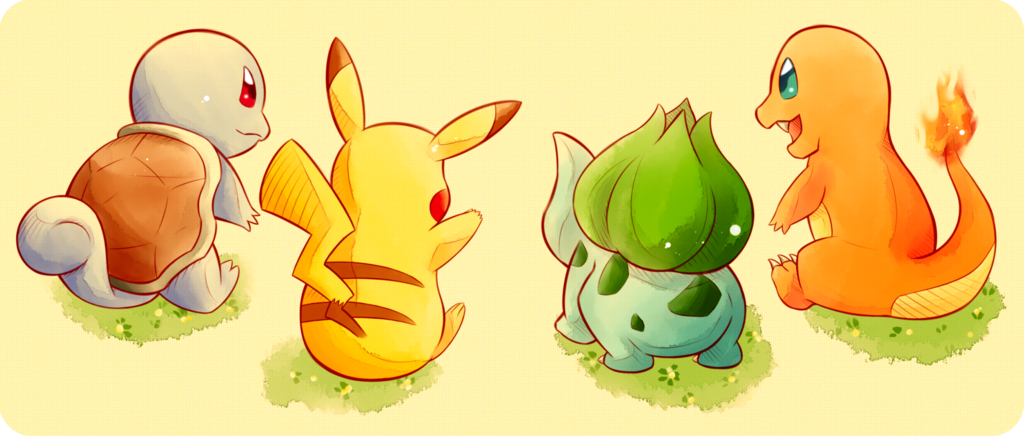




In [6]:
# Vamos a eliminar las columnas sin variación de la lista.

#Columnas numéricas
numeric_column = ['attack', 'defense', 'hp', 'weight_kg', 'generation']

# Columnas NO numéricas.
non_numeric_column = ['name', 'type1', 'type2']

# Seleccionamos un subconjunto juntando las características numéricas y categóricas. 
pokemon_df = pokemon[numeric_column + non_numeric_column]

# Mostrmos los datos por pantalla
print(pokemon_df.head())

   attack  defense  hp  weight_kg  generation        name  type1   type2
0      49       49  45        6.9           1   Bulbasaur  grass  poison
1      62       63  60       13.0           1     Ivysaur  grass  poison
2     100      123  80      100.0           1    Venusaur  grass  poison
3      52       43  39        8.5           1  Charmander   fire     NaN
4      64       58  58       19.0           1  Charmeleon   fire     NaN


### Ejercicio 0 . Elimina la columna sin variabilidad.

Utiliza el df que acabamos de crear y que se llama pokemon_df


In [7]:
#Puedes eliminar la variabilidad utilizando drop
pokemon_df = pokemon_df.drop(['generation'], axis=1)

### ¿Por qué reducir la dimensionalidad?

Así, el dataset:


*   Será Menos Complejo
*   Requerirá de menos espacio en disco
*   Necesita menos tiempo de computación
*   Menos propenso al Overfitting



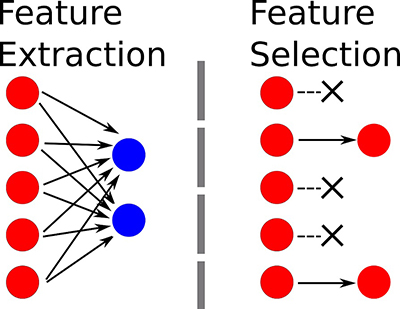

En comparación con la selección de características (feature selection), la extracción de características(feature extraction) es un enfoque completamente diferente pero con el mismo objetivo de reducir la dimensionalidad. En lugar de seleccionar un subconjunto de características de nuestro conjunto de datos inicial, calcularemos o extraeremos nuevas características de las originales. Estas nuevas características que hemos generado contienen la menor cantidad de información redundante posible y,son menos numerosas. **Una desventaja es que las funciones recién creadas a menudo son menos intuitivas de entender que las originales.**

##2. Feature Redundancy con  Pairplot

### ANSUR II DATASET

Los datos del ANSUR (del inglés Anthropometric Survey of US Army Personnel) es el dataset público más completo sobre tamaño y forma corporal.

Este dataset Incluye 93 medidas para más de 6.000 militares estadounidenses adultos (4.082 hombres y 1.986 mujeres). 

https://www.openlab.psu.edu/ansur2/


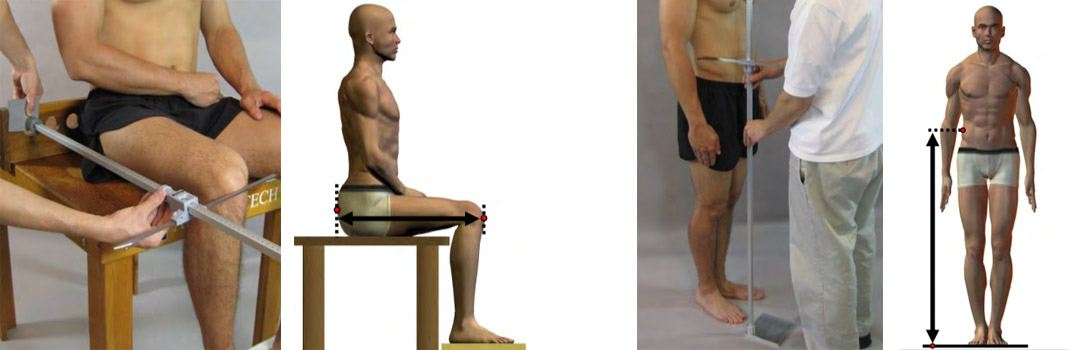



### ¿Por qué es tan útil este dataset?

1. **Tamaño y calidad del conjunto de datos**: El conjunto de datos contiene mediciones antropométricas detalladas de más de 6,500 sujetos militares de los Estados Unidos, lo que lo convierte en una de las bases de datos antropométricas más grandes y completas disponibles públicamente. Además, el conjunto de datos se recopiló con un protocolo de medición estandarizado y de alta calidad, lo que lo hace confiable para su uso en análisis estadísticos y modelos de aprendizaje automático.

2. **Representatividad de la población**: El conjunto de datos incluye mediciones de una amplia variedad de sujetos militares, de diferentes edades, géneros, razas y etnias, lo que lo hace representativo de la población militar de los Estados Unidos. Esto permite que los modelos y análisis basados en el conjunto de datos tengan una mayor generalización y aplicabilidad a la población en general.

3. **Aplicaciones prácticas**: El conjunto de datos ha sido utilizado en una amplia variedad de aplicaciones prácticas, como el diseño de equipos de protección personal, la simulación de ropa y equipo militar y el desarrollo de modelos estadísticos para predecir la distribución de tallas y medidas antropométricas. Esto lo hace relevante y útil para la industria y la investigación en una variedad de campos, desde la ingeniería hasta la moda y el diseño de productos.



In [8]:
import pandas as pd
import seaborn as sns 

ansur_set = pd.read_csv('C:/Users/dario/OneDrive/Documentos/GitHub/M-ster-EDEM-22-23/3_Aprendizaje_Automatico/Machine_Learning/Regresión/Datasets/ansur_set.csv',) 
ansur = pd.read_csv('C:/Users/dario/OneDrive/Documentos/GitHub/M-ster-EDEM-22-23/3_Aprendizaje_Automatico/Machine_Learning/Regresión/Datasets/ansur_complete.csv',)


ansur.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


### Visualizaciones con PairPlot y ANSUR

Seaborns pairplot() es excelente para explorar visualmente conjuntos de datos pequeños. Proporciona compartivas 1 vs 1 de características numéricas en forma de diagrama de dispersión. El ejemplo mostrado aquí, visualiza una muestra de datos del dataset ANSUR II.

In [ ]:
#ansur_set es un subconjunto de caracteristicas del dataset original.

ansur_set.drop(['Unnamed: 0'], axis=1, inplace=True)

#Visualizamos sus características
ansur_set.head()


### Ejercicio 0.1. Utiliza el método describe

¿Podemos eliminar alguna característica **utilizando el método describe**?



In [ ]:
#Queremos información por separado, tanto de las variables categóricas como delas variables numéricas.
#COMPLETAr

ansur_set.describe()

In [ ]:
#UTILIZA EL MÉTODO DESCRIBE PARA EXPLORAR LA PRIMERA PARTE DE LOS DATOS. 

#Pista. Puedes utilizar el exclude para variables categóricas
#COMPLETAR
ansur_set.


In [ ]:
#Construimos el Pairplot con los datos de Ansur
#En seaborn, el parámetro hue se utiliza para determinar qué columna tiene que colorear los datos.
sns.pairplot(ansur_set, hue='Gender', diag_kind = 'hist')

###@
Podemos ver como todos los puntos de la variable **weights_lbs** están perfectamente correlacionados de forma positiva con los de la variable **weight_kgs**.

Estas variables se refieren a la misma magnitud del peso, expresada de 2 formas diferentes (libras y kgs).

Ya que las dos características contienen la misma información, tendría sentido eliminar una de las dos. 

También hay que notar que utilizamos la característica 'Gender' para colorear los puntos. Ya que vemos que todos los puntos son mujeres, podríamos eliminar esta característica también.


### Ejercicio. Elimina estas dos variables y vuelve a realizar el pairplot.



In [ ]:
#Puedes utilizar el método drop.
ansur_set.head()

In [ ]:
#Volvemos a utilizar seaborn para el pairplot.
sns.pairplot(ansur_set, diag_kind = 'hist')


### Creando distintos pairplots

La dimensionalidad de los datasets tal y como veremos a continuación, puede reducirse bastante utilizando feature extraction. De forma intuitiva, esto tiene sentido. 

<font color=”blue”>**Si nos dicen que una persona tiene pies grandes, manos grandes, brazos largos y piernas largas, podríamos concluír probablemente que se trata de una persona alta.**</font>

Vamos a visualizar esta afirmación de arriba en un  pairplot. 


In [ ]:
#Vamos a Realizar otro ejemplo. Cogemos otro subconjunto de características.

columnas = ['palmlength', 'handlength', 'footlength', 'forearmhandlength' ]

ansur_df = ansur[columnas]





In [ ]:
#Pintamos el diagrama de sns pairplot
g = sns.pairplot(ansur_df,  diag_kind = 'hist', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
g.fig.suptitle("Relación de longitud entre variables: palma, mano, antebrazo y pie",  y=1.1)


### Ejercicio1.1 

1) Carga el archivo ansur_set2.csv y realiza un pairplot. Utiliza la variable Gender para pintar los géneros

In [ ]:
#Carga el csv
ansur_set2 = #Completar
print(ansur_set2.head())

sns.pairplot(#Completar)

### Ejercicio1.2: 
2) Elimina una de las características redundantes. Puedes utilizar la función `drop`. Vuelve a  pintar el pairplot dividiendolo por género de nuevo


In [ ]:
 reduced_ansur = #Completa


# Creamos un pairplot con este nuevo dataset


### Ejercicio 1.3:
*3*) Utilizando el archivo ansur_set3.csv, realiza un pairplot dividido por género, encuentra la característica redundante y eliminala del dataset.

In [ ]:
#Carga el CSV
ansur_set3 = #Completa
ansur_set3.head()

In [ ]:
#Vemos las características del dataset
ansur_set3.describe()

In [ ]:
#Realizamos el pairplot

In [ ]:
#Eliminamos el atributo n_legs


## 3 t-SNE -t-Distributed Stochastic Neighbor Embedding (t_SNE)

t-Distributed Stochastic Neighbor Embedding (t_SNE) es una técnica no lineal  para la reducción de dimensiones que es muy útil en la visualización de datasets de altas dimensiones. Se aplica bastante en procesamiento de imágenes, NLP, genomic data, etc.,

De manera sencilla, lo que hace el algoritmo t-SNE es proyectar datos en una dimensión más pequeña, preservando el clustering de la dimensión mayor lo máximo posible.


t-SNE minimiza la divergencia entre dos distribuciones: una que mide las similitudes por pares de ojetos iniciales y otra que mide la similitud por pares de objetos con la dimensionalidad reducida.

De esta manera, t-SNE mapea los datos multidimensionales a un espacio dimensional inferior e intenta encontrar patrones en los datos identificando grupos observados basándose en la similitud de puntos de datos con múltiples características. **eSin embargo, después de este proceso, las características de entrada ya no son identificables y no puede hacer ninguna inferencia basada solo en la salida de t-SNE. Por lo tanto, es principalmente una técnica de exploración y visualización de datos.** 








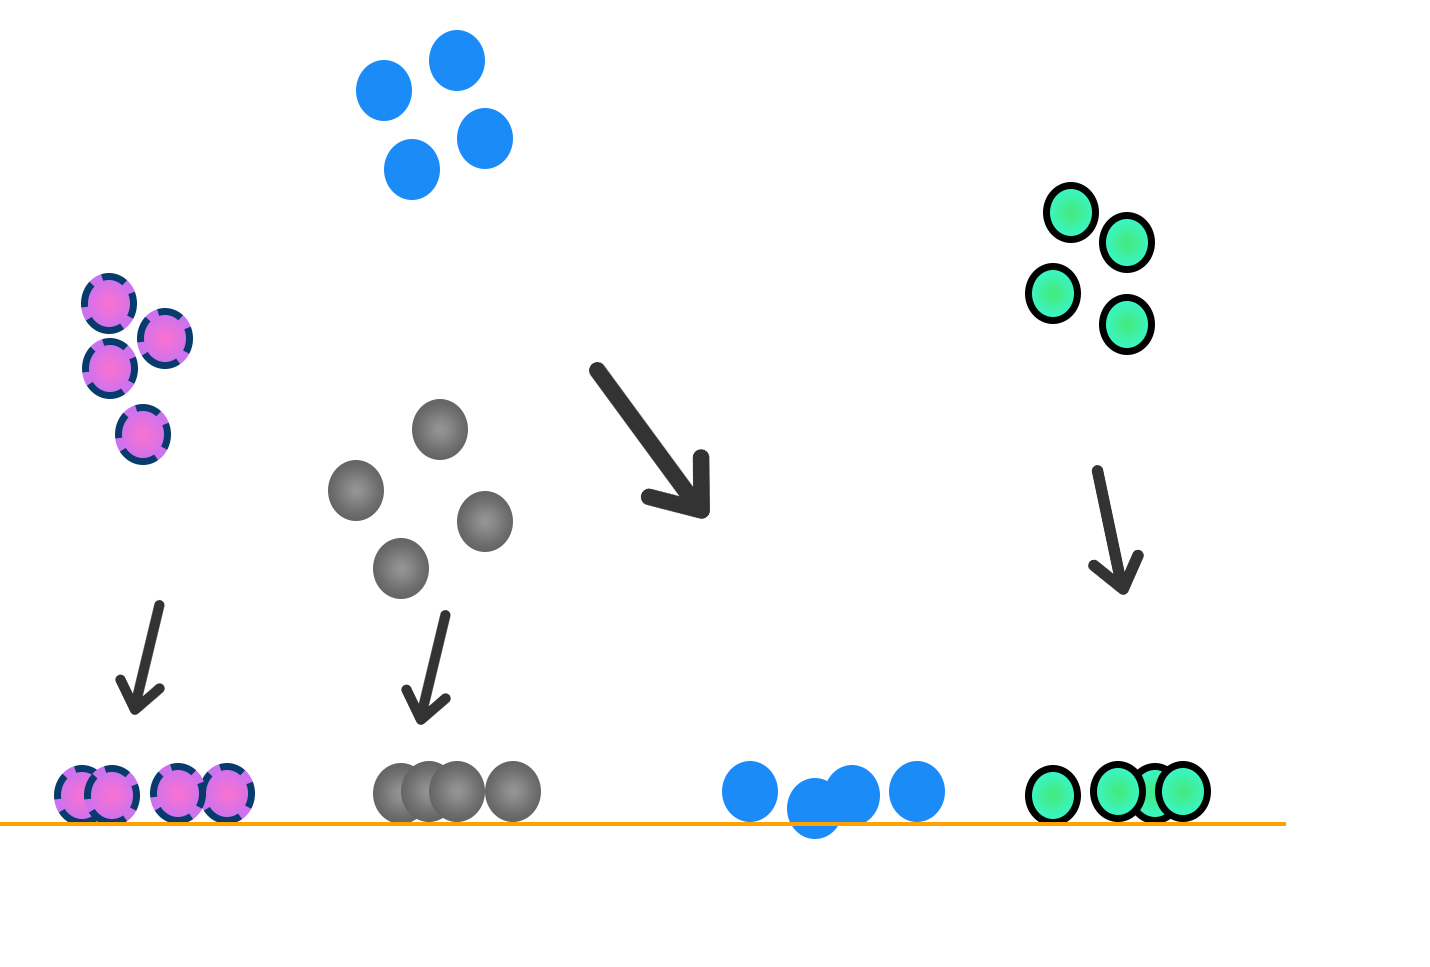



### Ejercicio 2: Entrenando T-SNE con el dataset ANSUR

Como ya hemos visto, t-SNE es una gran técnica no lineal no supervisada para la exploración de datasets en muchas dimensiones. 

En el siguiente ejercicio, quitaremos las variables que no son numéricas y entrenaremos t_SNE con la parte numérica.



In [ ]:
#Las siguientes columnas son numéricas.
columnas_num = ['Installation', 'Component', 'PrimaryMOS', 'Branch', 
                  'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference', 'Gender', 'Date', 
                  'SubjectId']

#Eliminamos las columnas numéricas del dataset. Quitar
ansur_num = ansur.drop(columnas_num, axis=1)

#Una forma elegante de comprobar si aún tenemos columnas categóricas es con la instrucción select_dtypes.
ansur_num.select_dtypes(['category'])

Creamos un modelo t-SNE con un learning-rate de 50 y entrenalo con las variables numéricas.

Para ello utilizaremos el paquete [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)



In [ ]:
#Importamos la librería de sklearn
from sklearn.manifold import TSNE

#Antes de entrenar el modelo, tenemos que eliminar los valores nulos. Estos se encuentran  en la columna subjectid.
ansur_num.drop('subjectid', axis=1, inplace=True)

#Creamos un modelo t-SNE con un learning rate de 50
m = TSNE(learning_rate=50)

# Entrenamos el modelo con nuestros datos numéricos
tsne_features = m.fit_transform(ansur_num)



In [ ]:
#Añadimos nuestras 2 componentes al dataset original

array = tsne_features.transpose()
ansur['x'] = array[0]
ansur['y'] = array[1]

In [ ]:
tsne_features.shape


**¡Acabamos de reducir el dataset de 98 características a 2!**




El siguiente paso será visualizar los resultados de nuestro modelo con diferentes gráficos de dispersión. Para ello, utilizaremos las 2 componentes X e Y que nos devuelve el modelo t-SNE. Así, podremos visualizar 98 dimensiones en solamente 2.


En concreto, crearemos 3 scatter plots para las 3 características: Gender, Component y Branch.




In [ ]:
#Definimos el tamaño del Scatter Plot. 
sns.set(rc={'figure.figsize':(14 ,11)})

#Vamos a practicar en nuestro dataset con muchas dimensiones.
# Realizamos el gráfico de dispersión y lo dividimos por Componentes.

sns.scatterplot(x="x", y="y", hue='Component', data=ansur)


# Show the plot
plt.show()

### Ejercicio 2: 

Realiza los ScatterPlot por las otras dos variables 'Branch' y 'Gender'

In [ ]:

#Realizamos el scatterplot por Branch
#Completa



# Show the plot
plt.show()

In [ ]:
#Realizamos el scatterplot por Gender
#Completa



# Show the plot
plt.show()


BINGO! Acabamos de ver que hay un clúster de mujeres y otro de hombres. 

T-SNE ha encontrado diferencias de género en las formas del cuerpo sin que nadie se lo indique explícitamente (no supervisado). 

Debido al descubrimiento de estos clústers, también hemos descubierto en el gráfico 2 que hay muchos más hombres en la sección de armas de combate que mujeres.

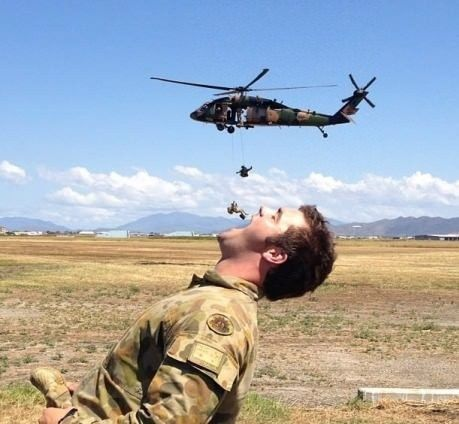

## 4 Pares de Correlaciones.

En esta parte de la práctica vamos a aprender sobre la correlación o dependencia entre variables, cómo calcularla y qué tipos de correlaciones existen.



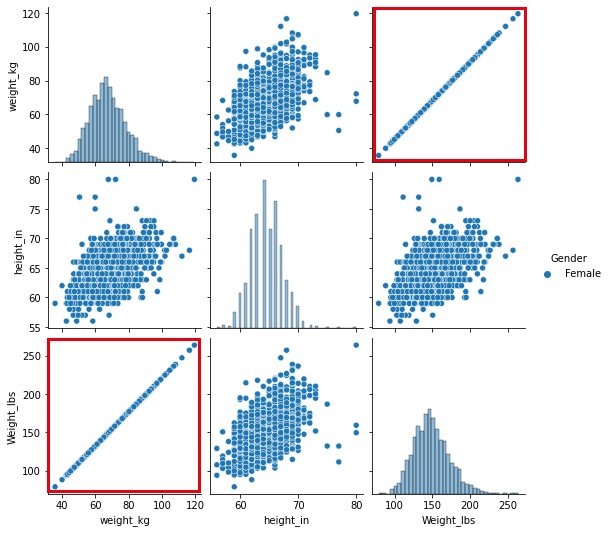


Si recordamos el pairplot que hemos visto antes. este nos servía para medir si dos variables estaban fuertemente correlacionadas. Sin embargo, si queremos cuantificar esta relación, este método no funciona. 


### Coeficiente de Correlación.

Para medir la fuerza de correlación entre variables aparece el coeficiente de correlación R. Este valor de R siempre viene entre -1 y +1. Menos uno es una correlación negativa total, cero indica que no hay correlación y más uno indica una correlación positiva total.

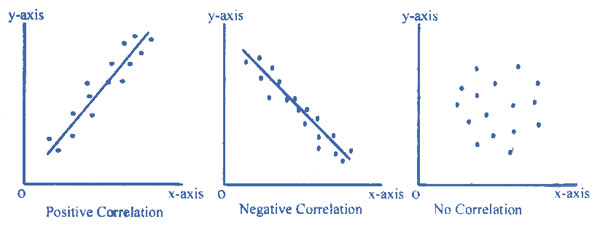

Cuando la relación entre dos características muestra más varianza, como suele ser el caso en los datos del mundo real, los coeficientes de correlación estarán un poco más cerca de cero. 
Podemos calcular el coeficiente de correlación con Pandas, utilizando el metodo `.corr()`

Con este método, obtendremos una matriz de correlación que nos dice el coeficiente de correlación de pearson entre pares de variables.

In [ ]:
import pandas as pd
import seaborn as sns


#Definimos el tamaño de los ficheros
plt.rcParams['figure.figsize'] = (10, 5)

#Cargamos de nuevo el dataset por si se ha reiniciado el entorno de ejecución de colab.
ansur_set = pd.read_csv('/content/drive/MyDrive/Edem/ansur_set.csv',) 
ansur = pd.read_csv('/content/drive/MyDrive/Edem/ansur_complete.csv',)

#Utilizamos el atrbiuto .corr de pandas.
ansur_set.corr()


De la matriz de arriba podemos ver cómo características como el peso en Kgs y el Peso en Libras, tienen una correlación perfecta de 1, lo que significa que sabiendo el valor de una variable, podemos saber exactamente el valor de la otra. Por defecto la matriz de correlación nos muestra una diagonal de unos, lo cual es normal si pensamos que una característica tiene correlación total con ella misma.


Ahora vamos a utilizar seaborn para crear una matriz de correlación con más estilo y que nos hará las relaciones más sencillas de entender.

In [ ]:
#Creamos una paleta de colores
cmap = sns.diverging_palette(10, 240, n=6)

#Creamos la matriz de correlación
sns.heatmap(ansur_set.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")



Podemos mejorar el gráfico de arriba eliminando información duplicada o innecesaria como los coeficientes de correlación de la diagonal creando una máscara de booleanos con numpy

In [ ]:
import numpy as np
corr = ansur_set.corr()

#Utilizamos la función np.ones_like() para crear una matriz de True values con las mismas dimensiones que nuestra matriz correlación.
#Luego le pasamos esto a Numpy triu() para que ponga a False todos los valores que no son del triángulo superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

In [ ]:
#Le pasamos la matriz de booleanos y así nos podemos centrar en la parte del gráfico que nos interesa 
sns.heatmap(ansur_set.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

### Ejercicio 3 - Calcula una matriz de correlación.

Realiza una matriz de correlación cómo la de arriba Utilizando las columnas que se indican abajo.

¿Cual es el coeficiente de correlación entre la muñeca y el tobillo?

¿Y entre el la altura hasta las nalgas (buttock height) y la altura hasta la entrepierna (crotch height)?

¿Qué características tienen la correlación más fuerte?


In [ ]:
#Estamos utilizando varias medidas. Altura hasta el codo, hasta las nalgas, altura de la entrepierna. circumferencia de la muñeca y del tobillo 
variables_matriz = ['elbowrestheight', 'buttockheight', 'crotchheight', 'wristcircumference', 'anklecircumference']

#Carga el nuevo dataset con las columnas que queremos utilizar
ansur_min = #ansur[variables_matriz]
ansur_min.head()

In [ ]:
#Sacar la matriz de correlación sobre ansur_min
corr = #Completa

#crear una matriz de booleanos con Numpy con las mismas dimensiones que nuestra matriz correlación.
mask = 
corr

In [ ]:
#Muestra la matriz de correlación
sns.heatmap #Completar

### Eliminando variables altamente correlacionadas.

Las características que están perfectamente correlacionadas entre sí, con un coeficiente de correlación de uno o menos uno, no aportan información nueva a un data set y aumentan la complejidad. Por tanto, querríamos eliminar una de las dos características que contienen la misma información. Además de esto, es posible que deseemos eliminar las características que tienen coeficientes de correlación cercanos a uno o menos uno.

En el siguiente ejemplo, vamos a eliminar características altamente correlacionadas en el dataset ANSUR. Para ello, calcularemos la matriz de correlación y eliminaremos las variables con un **coeficiente de correlación >0.95 o <-0.95**

In [ ]:
# Calculamos la matriz de correlación y toma el valor absoluto
corr_matrix = ansur.corr().abs()

#Creamos una máscara de True/False y la aplicamos sobre la matriz.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# Lista de nombres de columnas que tenemos que eliminar
quitar = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]


# Drop the features in the to_drop list
reduced_df = ansur.drop(quitar, axis=1)


print("El dataframe original tiene {} columnas.".format(ansur.shape[1]))
print("El dataframe reducido tiene {} columnas.".format(reduced_df.shape[1]))

### Correlación y Causalidad

Vamos a aprender la diferencia entre correlación y causalidad.

Energía Nuclear y ahogamientos en piscinas. Para ello, utilizaremos un dataset alojado en el fichero causalidad.csv que contiene información de los Centros para el Control y la Prevención de Enfermedades de EE. UU. Y el Departamento de Energía.


In [ ]:
causa = pd.read_csv('/content/drive/MyDrive/Edem/causalidad.csv')
causa

In [ ]:
#Hacemo un gráfico de dispersión con los datos
sns.scatterplot(x='energia_nuclear', y='ahogados', data=causa)
plt.show()

In [ ]:
#Imprimimos la matriz de correlación
causa.corr()


¿Qué implica en este caso la fuerte correlacion `r=0.9`?

Podemos deducir que si se incrementa la energía nuclear el año que viene, mejor no ir a nadar? ¿O que quizás si reducimos el número de piscinas tendremos un planeta más limpio de energía nuclear?

Obviamente NO. Correlación NO implica causalidad

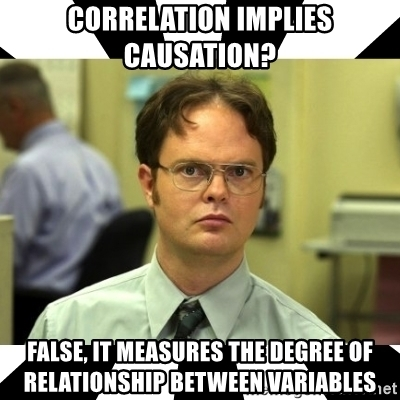

## 5 Seleccionando variables para el desarrollo  del Modelo.

Hasta ahora, hemos analizado las propiedades individuales o por pares de las características para decidir si las mantenemos en el data set o no. Otro enfoque, más pragmático, es **seleccionar características en función de cómo afectan el rendimiento del modelo.**

Para realizar esta parte, vamos a crear un clasificador de género utilizando 5 medidas del cuerpo humano.



*   chestdepth
*   handlength
*   neckcircumnference
*   shoulderlength
*   earlength




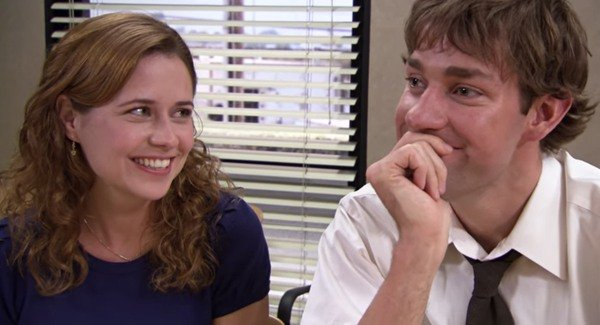

In [ ]:
#Las 5 variables que usaremos para predecir
X = ansur[['chestdepth', 'handlength', 'neckcircumference', 'shoulderlength', 'earlength']]
#El output de nuestro modelo
y = ansur[['Gender']]



In [ ]:
#Para entrenar el clasificador, primero hacemos un train-test split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#También estandarizamos el dataset de entrenamiento X_Train para que tenga una media de cero y una varianza de uno

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Utilizamos fit_transform para entrenar el scaler y transformar los datos en una instrucción
X_train_std = scaler.fit_transform(X_train)

### Creando un modelo de Regresión logística.

Aunque podríamos utilizar muchos algoritmos distintos, utilizaremos un modelo de regresión logística. Veremos que funciona muy bien.



In [ ]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

#Para ver cómo funciona el modelo en el test set, primero transformamos las variables con el scaler que utilizamos en el conjunto de entrenamiento
X_test_std = scaler.transform(X_test)

#Hacemos la predicción
y_pred = lr.predict(X_test_std)
print(format(accuracy_score(y_test, y_pred), ".2f"))



In [ ]:
print(lr.coef_)

Obtenemos un accuracy de  un 99%. Sin embargo, cuando observamos los coeficientes de características que usa el modelo de regresión logística en su función de decisión, veremos que algunos valores están bastante cerca de cero. Dado que estos coeficientes se multiplicarán por los valores de las características cuando el modelo haga una predicción, las características con coeficientes cercanos a cero contribuirán poco al resultado final.

In [ ]:
#utilizamos la función ZIP para crearnos un diccionario que nos diga qué característica tiene cada coeficiente

print(dict(zip(X.columns, abs(lr.coef_[0]))))

Si queremos eliminar una característica del conjunto de datos inicial con el menor efecto posible en el output, deberíamos elegir la que tenga el coeficiente más bajo, "handlength" (longitud de la mano) en este caso. El hecho de que estandarizamos los datos primero asegura que podamos comparar los coeficientes entre sí.

In [ ]:
X.drop('handlength', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_std = scaler.fit_transform(X_train)

lr.fit(scaler.fit_transform(X_train), y_train)

print(format(accuracy_score(y_test, lr.predict(scaler.transform(X_test))),".2f"))

En este caso, el accuracy se mantiene mientras la complejidad del dataset se reduce. Podríamos repetir el proceso recursivamente hasta encontrar el conjunto óptimo de características. Pero, por suerte, hay una función que hace esto mismo.

### RFE - Recursive Feature Elimination

Es un algoritmo de feature selection que se puede ajustar a cualquier modelo que produzca coeficientes de características o coeficientes de importancia. 

Dado un estimador externo que asigna pesos a las características (por ejemplo, los coeficientes de un modelo lineal), el objetivo del RFE es seleccionar características considerando recursivamente subconjuntos de características cada vez más pequeños. Mientras se ajusta a nuestros datos, repetirá un proceso en el que primero se ajusta al modelo interno y luego elimina la función con el coeficiente más débil. Seguirá haciendo esto hasta que se alcance el número deseado de variables. 

Es un Wrapping Method. Básicamente es un Backward Selection

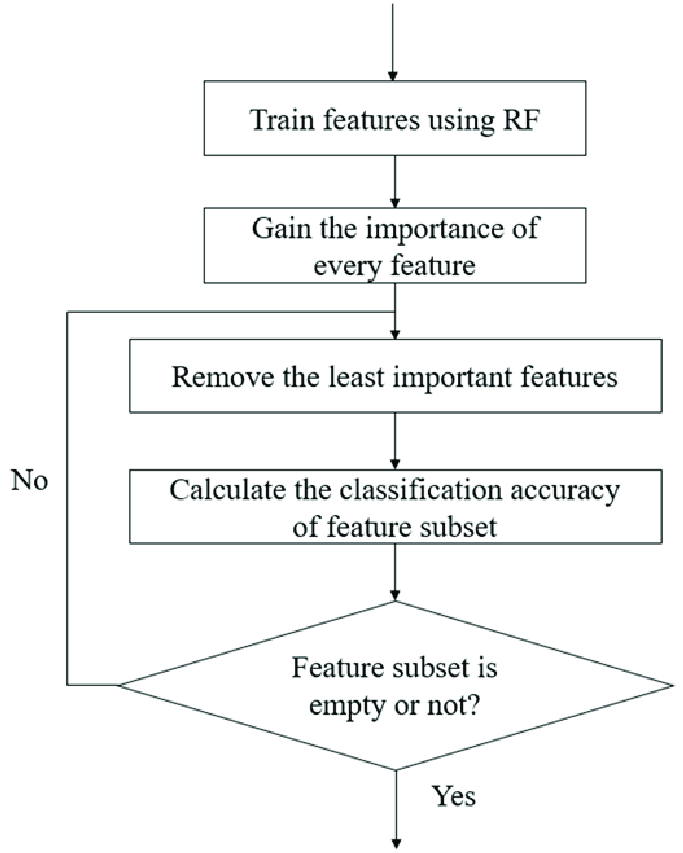

In [ ]:
#Volviendo al ejemplo del clasificador de arriba
X.head()

In [ ]:
from sklearn.feature_selection import RFE

#Seleccionamos el estimador (en este casa, un regresión logística, pero podría ser un Decision Tree Classifier o un SVR) y el número de características a elegir
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=50)
rfe.fit(X_train_std, y_train)



In [ ]:
#Una vez ha terminado, podemos utilizar el atributo de soporte para ver qué características se mantienen en el dataset

X.columns[rfe.support_]

In [ ]:
#Una vez más, con el atributo ZIP, podemos utilizar rfe.ranking para ver en qué iteración la característica fue eliminada
#Valores bajos significan que la característica se quedó en el dataset y valores altos que se eliminó pronto
print(dict(zip(X.columns, rfe.ranking_)))

In [ ]:
#Finalmente, vemos el accuracy con las características restantes.
X_test_std = scaler.transform(X_test)


print(format(accuracy_score(y_test, rfe.predict(X_test_std)),".2f"))

El accuracy se mantiene Igual!!

In [ ]:
y_train.columns

### Clasificador de Diabetes

Utilizaremos *Pima Indians diabetes dataset* para predecir si una persona tiene diabetes mediante regresión logística. Hay 8 variables y un target en este conjunto de datos. 

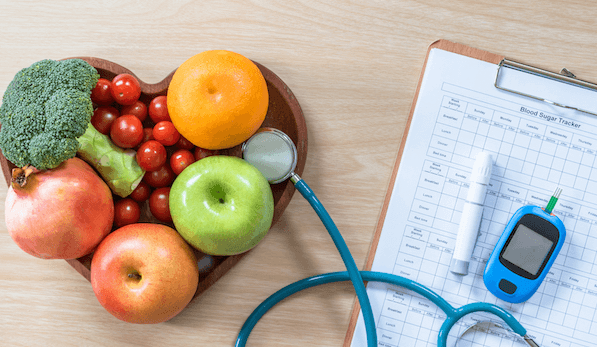

In [ ]:
#Cargamos el dataset pimaindians

diabetes = pd.read_csv('/content/drive/MyDrive/Public Data/PimaIndians.csv')
diabetes.head()

### Ejercicio 4 - Construye un clasificador de diabetes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()


# Seleccionamos las variables X e Y
X = diabetes[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]
y = diabetes[['test']]

# Realiza una división de entrenamiento del 25-75%
X_train, X_test, y_train, y_test = #

# Escala las características y ajusta el modelo de regresión logística
#Completar

# Calcula el accuracy en el test set e imprime los coeficientes de la regresión
acc = #Completar
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

Conseguimos alrededor de un 75% de accuracy en el test set



### Ejercicio 4 - Eliminación Manual de características

Ahora que hemos creado un clasificador de diabetes, veamos si podemos reducir la cantidad de funciones sin dañar demasiado la precisión del modelo.
*Elimina* de forma manual la característica con el coeficiente más bajo.



In [ ]:
X = diabetes[[#Completa]]
y = diabetes[['test']]
# Realiza una división de entrenamiento del 25-75%


# Escala las características y ajusta el modelo de regresión logística
#Completar

# Calcula el accuracy en el test set e imprime los coeficientes de la regresión


Mejoramos incluso el accuracy después de eliminar características.

Lanza otra vez el código y elimina esta vez las **DOS** características con los coeficientes más bajos.




In [ ]:
X = diabetes#Completa
y = diabetes[['test']]

# Realiza una división de entrenamiento del 25-75%


# Escala las características y ajusta el modelo de regresión logística
#Completar

# Calcula el accuracy en el test set e imprime los coeficientes de la regresión



Lanza otra vez el código y QUEDATE ÚNICAMENTE con la característica de mayor coeficiente



In [ ]:
X = diabetes#Completa
y = diabetes[['test']]

# Realiza una división de entrenamiento del 25-75%


# Escala las características y ajusta el modelo de regresión logística
#Completar

# Calcula el accuracy en el test set e imprime los coeficientes de la regresión

### RFE con 3 Variables

Ahora automaticemos este proceso recursivo. Utilizaremos un Recursive Feature Eliminator (RFE) alrededor de nuestro estimador de regresión logística y le pasaremos el número deseado de columnas, en este caso 3.

Seguiremos con el dataset de IndiansPima Diabetes

Estos serán los pasos.


1.   Crear una instancia de LogisticRegression() con 3 variables.
2.   Entrenar el modelo
3.   Muestra las características que no se han eliminado




In [ ]:
diabetes.head(10)

In [ ]:
X = diabetes[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]

y = diabetes[['test']]

# Realiza una división de entrenamiento del 25-75%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)


#Primero, creamos una instancia de regresión logística con 3 variables
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

#Estandarizamos el training set y entrenammos el modelo
rfe.fit(scaler.fit_transform(X_train), y_train)

# Imprimimos por pantalla las características y su ránking
print(dict(zip(X.columns, rfe.ranking_)))

# Mostramos las características que no han sido eliminadas
print(X.columns[rfe.support_])


# Evaluamos el modelo
acc = accuracy_score(y_test, rfe.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 

Acabamos de eliminar todas las características excepto 3, y tenemos un accuracy del 80.6%.

## 6 Regresión Linear Regularizada

Para refrescar un poco cómo funciona la regularización, se ha añadido una pequeña slide donde vienen explicados cada uno de los conceptos. 

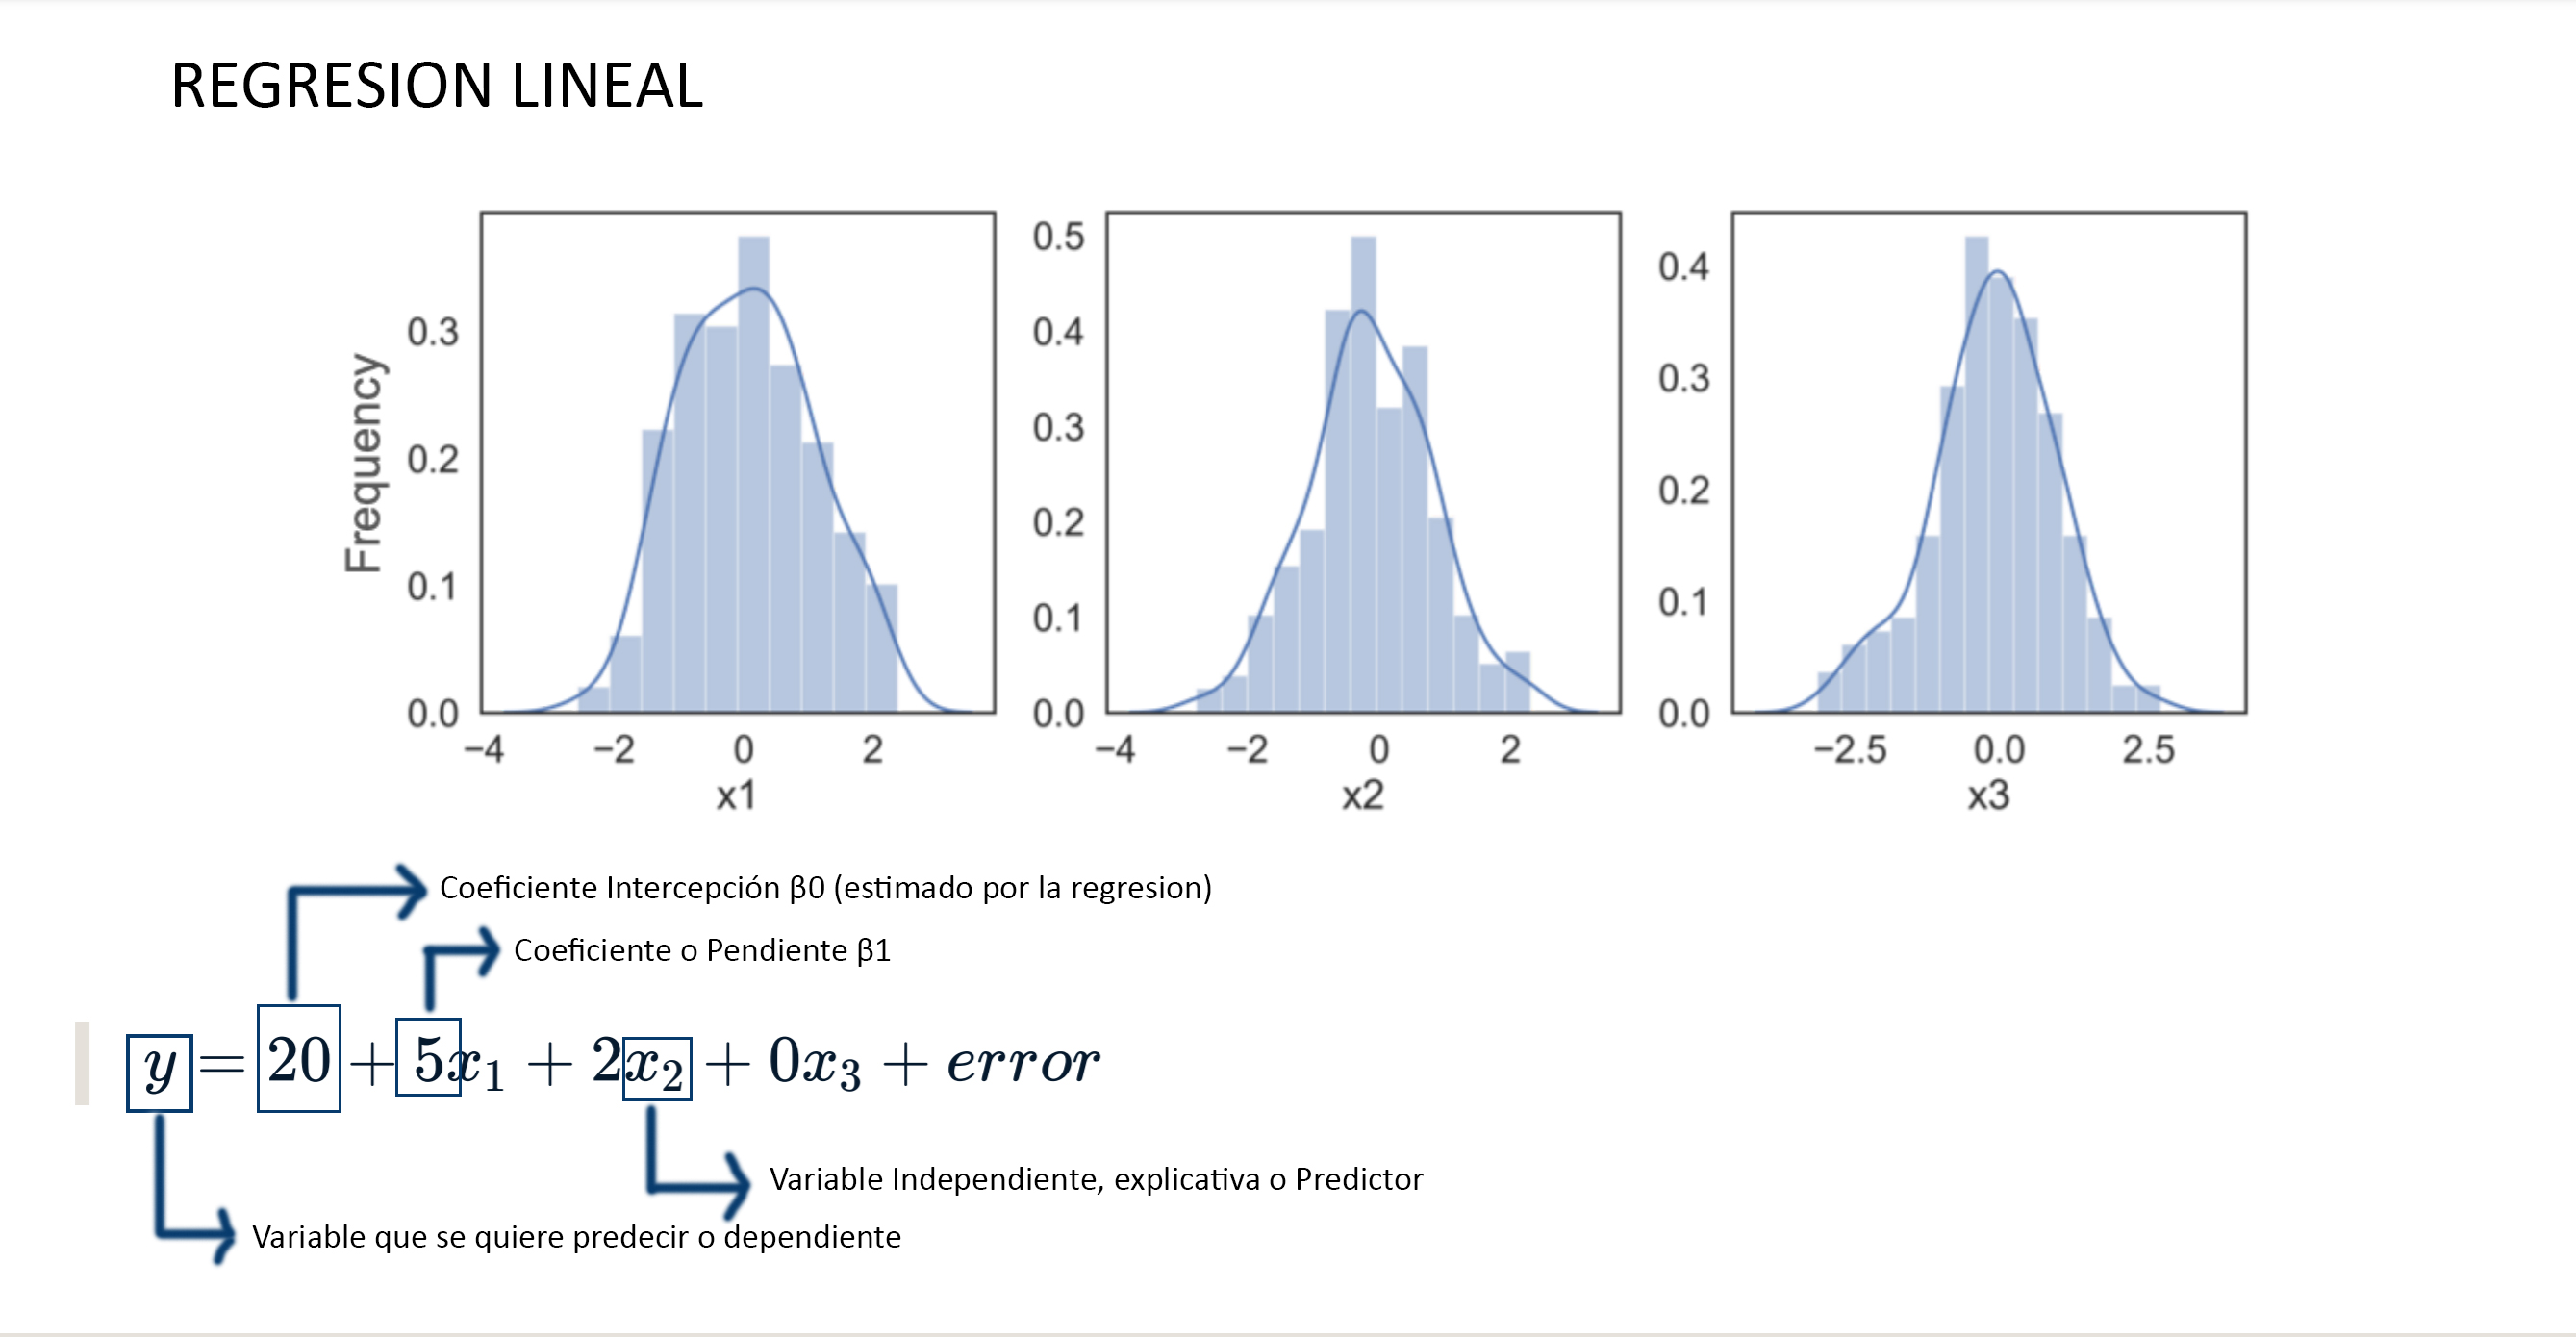

Función de Regularización de Lasso

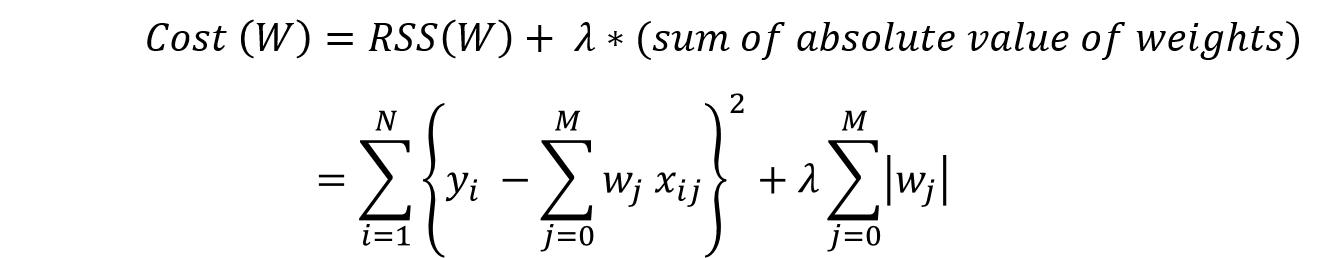

### Creando una Regresión de Lasso

En este ejercicio Trabajaremos en el conjunto de datos numérico de medidas corporales ANSUR para predecir el índice de masa corporal (IMC) de una persona utilizando el regresor Lasso (). El IMC es una métrica derivada de la altura y el peso corporal, pero esas dos características se van a eliminar del dataset para desafiar al modelo.


Un paso importante aquí será estandarización del datset utilizando el `StandardScaler()`


In [ ]:
#Las siguientes columnas son numéricas.
columnas_num = ['Installation', 'Component', 'PrimaryMOS', 'Branch', 
                  'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference', 'Gender', 'Date', 
                  'SubjectId']

#Eliminamos las columnas numéricas del dataset. Quitar
ansur_num = ansur.drop(columnas_num, axis=1)


In [ ]:
#Calculamos el IMC
ansur_num['IMC'] = ansur_num['Weightlbs']*703 / pow(ansur_num['Heightin'], 2)


In [ ]:
#IMC Contienen información relevante del peso y la altura. Procederemos a eliminarlas para añadir dificultad.
ansur_num[['IMC', 'Weightlbs', 'Heightin']]

In [ ]:
#Seleccionamos las columnas a eliminar. Eliminamos el peso Añadimos SubjectID porque contiene NAN y daría errores.
drop_columns = ['Heightin', 'Weightlbs', 'weightkg', 'subjectid']

#Las quitamos del dataset y creamos un nuevo df llamado BMI
IMC = ansur_num.drop(drop_columns, axis=1)
print(IMC.shape)

#Seleccionamos X e y
y = IMC['IMC']
X = IMC.drop(['IMC'], axis=1)


In [ ]:
from sklearn.linear_model import Lasso

# Partimos el dataset entre 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Ajustamos el scaler y estandarizamos las características en una sola instrucción 
X_train_std = scaler.fit_transform(X_train)

# Creamos el modelo de Lasso
la = Lasso()


In [ ]:
 #Comprobamos si hay columnas con valores Nulos.
 IMC.columns[IMC.isna().any()].tolist()

In [ ]:
# Ajustamos lasso a los datos de entrenamiento estandarizados
la.fit(X_train_std, y_train)

Buen trabajo! Hemos adaptado el modelo Lasso a los datos de entrenamiento estandarizados. ¡Ahora veamos los resultados!

Una vez entrenado el modelo, vamos a comprobar cómo de preciso es. Para medir su capacidad predictiva podemos calcular el valor de R2 cuadrado en el conjunto de prueba. R2  nos dice cuánto de la varianza en la variable dependiente puede predecir nuestro modelo. En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos.

También veremos cuantas características se ignorar porque el valor de R2 se reduce a cero.


In [ ]:
# Transformamos el test set
X_test_std = scaler.transform(X_test)

#Calculamos el coeficiente de determinación (R cuadrado) en el X_test_std
r_squared = la.score(X_test_std, y_test)
print("El modelo puede predecir {0:.1%} de la varianza en el test set.".format(r_squared))

#Creamos una lista que tenga True values cuando los coeficientes sean iguales a 0
zero_coef = la.coef_ == 0

# Calculamos cuantas características tienen coeficiente 0
n_ignored = sum(zero_coef)
print("El modelo ha ignorado {} de {} columnas.".format(n_ignored, len(la.coef_)))

 Podemos predecir más del 70% de la variación en el valor del IMC utilizando solo 10 de 98 características. Sin embargo, el R^2 podría ser más alto.

#### Ajustando la regularización de Lasso


Nuestro modelo de Lasso actual tiene una puntuación del 70.9%. Cuando un modelo aplica una regularización demasiado fuerte, puede sufrir un alto sesgo, lo que perjudica su poder predictivo.

Mejoremos el equilibrio entre el poder predictivo y la simplicidad del modelo ajustando el parámetro alfa. 

In [ ]:
alpha = {1, 0.5, 0.1, 0.01}


for a in alpha:
  # Vamos a probar todos los valores de alfa. Nos quedaremos con el que nos de el mejor resultado
  la = Lasso(alpha=a, random_state=0)

  print("For alhpa ", a)
  la.fit(X_train_std, y_train)
  r_squared = la.score(X_test_std, y_test)
  n_ignored_features = sum(la.coef_ == 0)

  #  Mostramos los resultados
  print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
  print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

Con esta regularización mejor ajustada, podemos predecir el 85% de la varianza en el valor del IMC ignorando 2/3 de las características.

### Combinando Selectores de Características

En la sección anterior, hemos visto cómo los modelos Lasso nos permiten ajustar la fuerza de la regularización con el parámetro alfa.

Configuramos manualmente este parámetro alfa para encontrar un equilibrio entre la eliminación de tantas funciones como sea posible y la precisión del modelo. Sin embargo, encontrar de forma manual un buen valor alpha puede resultar tedioso. La buena noticia es que hay una forma de automatizar esto.

Lasso CV Regressor

In [ ]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()


lcv.fit(X_train_std, y_train)

#Una vez entrenado el modelo con todos los valores, el atributo _alpha nos da el valor óptimo para el modelo
print(lcv.alpha_)

In [ ]:
#Para eliminar las características las cuales Lasso ha asignado a cero, creamos de nuevo una máscara de True values.

mask = lcv.coef_ != 0

print(mask)

In [ ]:
#Podemos entonces aplicar esta máscara para reducir el dataset.

reduced_X = X.loc[:, mask]
reduced_X.shape

#### Ejercicio - Predice circunferencia Bíceps.

En este ejercicio, vamos a predecir la circunferencia del bíceps en una submuestra del conjunto de datos ANSUR en hombres usando el regresor `LassoCV()` que obtiene automáticamente el mejor valor del alpha utilizando la Validación Cruzada (Cross Validation)

Para poder ver  mejor el efecto de combinar selectores, reduciremos la muestra a 1000 filas.

In [ ]:
ansur['IMC'] = ansur['Weightlbs']*703 / pow(ansur['Heightin'], 2)

#Seleccionamos columnas a mantener
Columnas = ['acromialheight', 'axillaheight', 'bideltoidbreadth', 'buttockcircumference', 'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestcircumference', 'chestheight',
       'earprotrusion', 'footbreadthhorizontal', 'forearmcircumferenceflexed', 'handlength', 'headbreadth', 'heelbreadth', 'hipbreadth', 'iliocristaleheight', 'interscyeii',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'neckcircumferencebase', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'sleeveoutseam',
       'thighcircumference', 'thighclearance', 'verticaltrunkcircumferenceusa', 'waistcircumference', 'waistdepth', 'wristheight', 'Gender', 'IMC']

ansur_male = ansur[Columnas]

#Filtramos el dataset por hombres.
ansur_male = ansur_male.loc[ansur_male['Gender'] == 'Male']

#Eliminamos la columna de género
ansur_male.drop(['Gender'], axis=1, inplace=True)

ansur_male = ansur_male.sample(n=1000)


ansur_male.shape

In [ ]:
#Definimos X e Y
X = #Completar

y = #Completar

In [ ]:
from sklearn.model_selection import train_test_split

#Realizamos la división del dataset
X_train, X_test, y_train, y_test = #Completar

#Utilizamos fit_transform para entrenar el scaler y transformar los datos en una instrucción
X_train_std =#
X_test_std = #Completar

In [ ]:
from sklearn.linear_model import LassoCV

#Seleccionamos el selector y entrenamos con el conjunto de entrenamiento
lcv = #Completar
lcv.#Completar
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))


#Calculamos R cuadrado en el test set
r_squared = lcv.score(X_test_std, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Creamos una máscara para coeficientes que no sean iguales a cero.
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

**Combinando modelos**
Hemos conseguido un Valor bueno de R^2 y hemos eliminado 11 características. Nos guardamos la máscara para después.

Los resultados no están mal, pero tampoco son excelentes. Ahora, usaremos dos modelos más para seleccionar las 10 características más importantes usando el Recursive Feature Eliminator (RFE).
*texto en cursiva*

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Seleccionamos 10 variables con RFE en un GradientBoostingRegressor, quitamos 3 variables en cada iteración
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train_std, y_train)

# Calculamos el R cuadrado en el test set
r_squared = rfe_gb.score(X_test_std, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Asignamos el array de soporte a la máscara
rfe_gb_mask = rfe_gb.support_


Vamos a hacer lo mismo, esta vez utilizando un Random Forest Regressor.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Seleccionamos 10 variables con RFE en un RandomForestRegressor, quitamos 3 variables en cada iteración
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train_std, y_train)

# Calculamos el R cuadrado en el test set
r_squared = rfe_rf.score(X_test_std, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Asignamos el array de soporte a la máscara
rfe_rf_mask = #Completar


¡Buen trabajo! Incluyendo el modelo lineal Lasso del ejercicio anterior, ahora tenemos los outputs de 3 modelos sobre qué variables son importantes.

### Combinando 3 feature selectors
Combinaremos los outputs de los 3 modelos que construiste en los ejercicios anteriores para decidir qué características son importantes en una meta máscara. Luego usaremos esta máscara para reducir la dimensionalidad y veremos cómo funciona un regresor lineal simple en el conjunto de datos reducido.

In [ ]:
## Sumamos los Votos de los 3 modelos
votes = np.sum([lcv_mask, rfe_rf_mask, rfe_gb_mask], axis=0)
print(votes)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Creamos una meta máscara para características seleccionadas por los 3 modelos
meta_mask = votes >= 3

#Aplicamos reducción de la dimensionalidad en X
X_reduced = X.loc[:, meta_mask]

# Conectamos el conjunto de datos reducido a un pipeline de regresión lineal
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

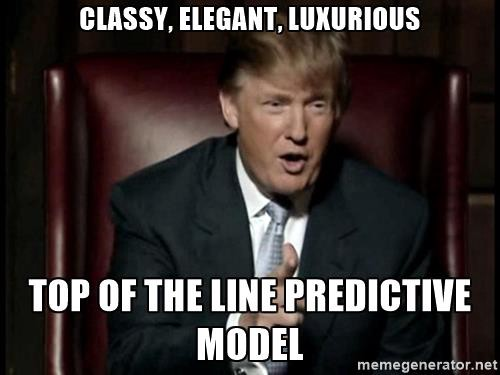

## 7 PCA 

En esa parte inspeccionaremos visualmente una muestra de 4 características del conjunto de datos ANSUR antes y después del PCA utilizando Seaborns `Pairplot()`. Esto nos permitirá inspeccionar las correlaciones por pares entre las características.




In [ ]:
#Cogemos las 4 características
ansur_pca = ansur[['Heightin', 'buttockheight', 'waistcircumference', 'shouldercircumference' ]]

#Cogemos una muestra pequeña
ansur_pca = ansur_pca.sample(n=300)

#Convertimos inches a metros

ansur_pca['altura'] = round(ansur_pca['Heightin']/39.37,2)

ansur_pca.drop('Heightin', axis=1, inplace=True)

ansur_pca.head()

In [ ]:
# Crea un  pairplot para inspeccionar ansur_pca
sns.pairplot(ansur_pca)

plt.show()

In [ ]:
#Crea el scaler y estandariza los datos
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_pca)


In [ ]:
# Crea la isntancia PCA y tansforma los datos con PCA
pca = PCA()
pc = pca.fit_transform(ansur_std)

# Devuele el output de numpy array, otra vez a DF
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

#Crea un pairplot de pc_df, el dataframe de componentes principales
sns.pairplot(pc_df)
plt.show()

En el pairplot resultante podemos ver cómo no existe ningún tipo de correlación entre las componentes principales resultantes.

### Ejercicio - Construye un PCA con Ansur.

Ahora aplicaremos el PCA en una muestra de datos ANSUR algo más grande y con 13 variables.


Vamos a utilizar las siguientes 13

In [ ]:
columns = ['Heightin', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']

ansur_pca = ansur[columns]

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escala los datos
scaler = #completar
ansur_std = #completar

# Aplica PCA.
pca = PCA()

#Entrena la instancia de pca
pca.#completar

Muy bien. Ha ajustado el PCA a nuestra muestra de datos de 13 características. Ahora veamos cómo los componentes explican la varianza.



---


¿Cuanta varianza explica el cuarto componente?

In [ ]:

#PARTE A COMPLETAR
# Inspecciona la varianza del PCA.
print(##Completar)

**Calcula la suma acumulada del ratio de varianza utilizando un método de pca.**

¿Cuál es el número más bajo de PC que debemos conservar si no queremos perder más del 4% de la varianza explicada durante la reducción de dimensionalidad?

In [ ]:
# Print the cumulative sum of the explained variance ratio. Utuliza el metodo cumsum()
print(#Completar)

### PCA Pokémon

Aplicará PCA a las características numéricas del conjunto de datos de Pokémon,  utilizando un pipeline para combinar la escala de características y PCA de una sola vez. Luego interpretará los significados de los dos primeros componentes.

In [ ]:
pokemon = pd.read_csv('/content/drive/MyDrive/Edem/pokemon.csv')

#nos quedamos con las siguietnes columnas
columnas = ['HP' , 'Attack' , 'Defense' , 'Sp. Atk' , 'Sp. Def' , 'Speed']
pokemon = pokemon[columnas]
pokemon.head()

El atributo correcto termina con un guión bajo `(_)`. Esta es una convención para todos los atributos de los estimadores sklearn que tienen un valor significativo después de que se llamó a `.fit ()`.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Construímos el pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Ajustalo al dataset y extrae los componentes principales. Redondea las componentes a 2 dígitos decimales.
pipe.fit(pokemon)
vectors = pipe.steps[1][1].components_.round(2)

# Imprime por pantalla los efectos. Acuerdate del zip.
print('PC 1 effects = ' + str(dict(zip(pokemon.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(pokemon.columns, vectors[1]))))

¿Qué podemos interpretar de los efectos de las PC?

#### Elige la verdadera.
1)Todas las características tienen un efecto positivo similar. La PC 1 puede interpretarse como una medida de calidad general (estadísticas altas).

2)`Sp. Atk` tiene el mayor efecto en esta característica con diferencia. PC 1 puede interpretarse como una medida de lo bueno que es el ataque especial de un Pokemon.


### Eligiendo el número de componentes adecuadas

Ahora tomaremos una decisión más *informada* sobre el número de componentes principales a los que reducir los datos utilizando el método elbow. Vamos a trabajar con un subconjunto de datos de mujeres



In [ ]:
ansur = pd.read_csv('/content/drive/MyDrive/Edem/ansur_complete.csv',)

ansur_female = ansur.loc[ansur['Gender'] == 'Female']


In [ ]:
#Calculamos altura en m bajo el nombre 'altura'
ansur_female['stature_m'] = round(ansur_female['Heightin']/39.37,2)

#Arreglamos variables peso en kgs y llamala weight_kg
ansur_female['weight_kg'] = ansur_female['weightkg']/10

#Calculamos de Nuevo el IMC
ansur_female['IMC'] = ansur_female['Weightlbs']*703 / pow(ansur_female['Heightin'], 2)

In [ ]:
#Vamos a elegir estas columnas
Columnas = ['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg', 'stature_m', 'IMC']

ansur_female = ansur_female[Columnas]
ansur_female.shape

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Ajuste pipeline a los datos
pipe.fit(ansur_female)


# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

¿A cuántos componentes se puede reducir el conjunto de datos sin comprometer demasiado la varianza?